# **AdvDS - Assignment 1: Binary Classification - NBA Player Prediction - Data Preparation**

Build a binary classification model that can predict if a rookie player will last at least 5 years in the NBA

**Student Name:** Nathan Fragar

**Student No. :** 93087548

**Week:** 4

**Date:** 06MAR2022

**Team Name:** Group 1
* Carol Myhill - 90014679
* Nathan Fragar - 93087548
* Nuwan Munasinghe - 13104409
* Sean Williams - ??
* Wenying Wu - 14007025 

## 1. Load Python packages and libraries

**[1.1]** Task: Change working directory to /home/jovyan/work

In [1]:
cd /home/jovyan/work

/home/jovyan/work


**[1.2]** Task: Import required packages: Pandas, Numpy, joblib

In [2]:
# Task: Import the pandas, numpy, scipy stats and joblib package
import pandas as pd
import numpy as np
from scipy import stats
import joblib as job

# Learning Model
from sklearn.linear_model import LogisticRegression as LR

# Optimising
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold

# Scoring
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Custom Functions
from src.data.sets import load_sets
from src.models.null import NullModel
from src.models.performance import score_model
from src.models.performance import score_models2
from src.indicator.sounds import beep_when_done	                   
from src.visualization.visualize import plot_confusion_matrix_full
from src.visualization.visualize import plot_roc_auc

from src.models.performance import score_null_model

**[1.3]** Task: Automatically Reload Modules

In [3]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2

**[1.3]** Task: Load Processed Data

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='data/processed/', val=False)

**[1.4]** Task: Verify number of observations in Processed Datasets

In [5]:
X_train.shape, y_train.shape,  X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5120, 42), (5120,), (1280, 42), (1280,), (1600, 42), (1600,))

## 3. Create Baseline Model

**[3.1]** Task: Find the mode of the target variable and print it's value

In [6]:
base_model = NullModel(target_type="classification")

In [7]:
y_base = base_model.fit_predict(y_train)

In [8]:
score_null_model(y_train = y_train, y_base = y_base, set_name="Base")

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Base,0.833594,0.407929,0.166406,1.0,0.833594,0.909246,None


The null accuracy is 83.35%
If we predict 1, we'll be correct 83.35% of the time

## 4. Logistic Regression - Hyperparameter Tuning with Grid Search and KFold

Train Logistic Regression Algorithm

1.   Use Grid Search to tune Hyper Parameters
2.   Use KFold with 5 Splits
3.   Fit Algorithm

**[4.1]** Create a dictionary containing the Randomized Grid Search Parameters

In [9]:
# Linear Regression Random Grid Parameters
# Class Weight
class_weight = ['balanced']
# Penalty
penalty = ['none','l2','l1','elasticnet']
# Solver
solver = ['liblinear','lbfgs']
# max_iter
max_iter = [1000]

random_grid = {'class_weight': class_weight,
               'penalty':penalty,
               'solver':solver,
               'max_iter':max_iter
               }



In [10]:
random_grid

{'class_weight': ['balanced'],
 'penalty': ['none', 'l2', 'l1', 'elasticnet'],
 'solver': ['liblinear', 'lbfgs'],
 'max_iter': [1000]}

**[4.2]** Task: Create RF Model, and use Randomized Search to find GridSearch range

In [11]:
lr_base = LR()
lr_random = RandomizedSearchCV(estimator = lr_base,
                               param_distributions = random_grid,
                               n_iter = 500, 
                               cv = 5,
                               verbose=2,
                               random_state=8, 
                               n_jobs = 4)

**[4.3]** Train Model

In [12]:
lr_random.fit(X_train, y_train.ravel())

# Beep when completed
# beep_when_done()

print(lr_random.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=500. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': 'balanced'}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is not

"print(lr_random.best_params_)"

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced'}

In [13]:
lr_best = LR(solver='lbfgs', penalty='l2', max_iter=500, class_weight='balanced').fit(X_train, y_train.ravel())

In [14]:
score_models2(X_train, y_train, X_val, y_val, X_test, y_test, y_base, True, lr_best)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Base,0.833594,0.407929,0.166406,1.000000,0.833594,0.909246,NaN
1,Train,0.652734,0.589292,0.347266,0.901354,0.655108,0.758752,0.703840
2,Validate,0.671094,0.573503,0.328906,0.900744,0.680412,0.775227,0.710020
3,Test,0.643750,0.596867,0.356250,0.886640,0.656672,0.754522,0.679355


**Observation** Training Model is overfitting

**[4.5]** Tune Hyperparameters to better reduce overfitting.

1. Increase Max Iterations = 1000
2. Penalty = l2

In [15]:
lr_best_1 = LR(solver='lbfgs', penalty='l2', max_iter=1000, class_weight='balanced').fit(X_train, y_train)

In [16]:
score_models2(X_train, y_train, X_val, y_val, X_test, y_test, y_base, True, lr_best_1)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Base,0.833594,0.407929,0.166406,1.000000,0.833594,0.909246,NaN
1,Train,0.652734,0.589292,0.347266,0.901354,0.655108,0.758752,0.703840
2,Validate,0.671094,0.573503,0.328906,0.900744,0.680412,0.775227,0.710020
3,Test,0.643750,0.596867,0.356250,0.886640,0.656672,0.754522,0.679355


**Observations**
* Validation Dataset is not performing well for the model, indicating Model is overfitting on Train Dataset

**[4.5.2]** Task: Attempt to use None Penalty

In [17]:
lr_best_2 = LR(solver='lbfgs', penalty='none', max_iter=1000, class_weight='balanced').fit(X_train, y_train.ravel())

In [18]:
score_models2(X_train, y_train, X_val, y_val, X_test, y_test, y_base, True, lr_best_2)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Base,0.833594,0.407929,0.166406,1.000000,0.833594,0.909246,NaN
1,Train,0.652148,0.589789,0.347852,0.900483,0.655108,0.758443,0.703843
2,Validate,0.671094,0.573503,0.328906,0.900744,0.680412,0.775227,0.709365
3,Test,0.641875,0.598435,0.358125,0.885512,0.655172,0.753124,0.678811


**[4.5.3]** Task: Attempt to use liblinear solver and L1 Penalty

In [19]:
lr_best_3 = LR(solver='liblinear', penalty='l1', max_iter=1000, class_weight='balanced').fit(X_train, y_train.ravel())

In [20]:
score_models2(X_train, y_train, X_val, y_val, X_test, y_test, y_base, True, lr_best_3)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Base,0.833594,0.407929,0.166406,1.000000,0.833594,0.909246,NaN
1,Train,0.650977,0.590782,0.349023,0.901586,0.652530,0.757102,0.703883
2,Validate,0.667188,0.576899,0.332813,0.900125,0.675726,0.771949,0.710905
3,Test,0.645000,0.595819,0.355000,0.887652,0.657421,0.755383,0.680837


**[4.6]** Task: Plot Confusion Matrix

Identify how well the model is performing at predicting the outcome

Train - Confusion matrix, without normalization
[[ 546  306]
 [1472 2796]]
Train - Normalized confusion matrix
[[0.64084507 0.35915493]
 [0.34489222 0.65510778]]
Validate - Confusion matrix, without normalization
[[154 112]
 [458 876]]
Validate - Normalized confusion matrix
[[0.57894737 0.42105263]
 [0.34332834 0.65667166]]


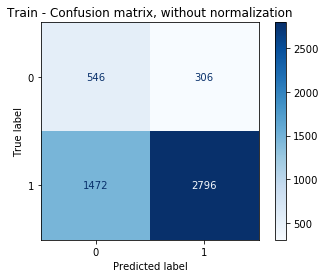

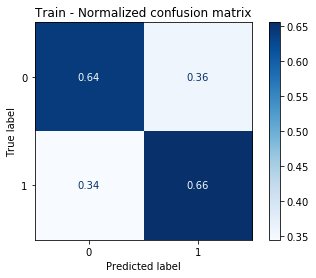

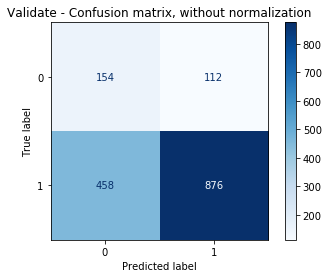

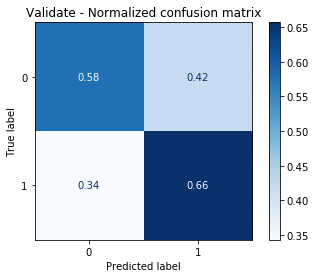

In [21]:
plot_confusion_matrix_full(model=lr_best_1, X_train = X_train, y_train = y_train, X_val = X_test, y_val = y_test)

**Observation** Both Models is predicting alot of False Positives (FP) in both training and validation datasets

**[4.7]** Task: Calculate AUROC

In [36]:
score_models2(X_train, y_train, X_val, y_val, X_test, y_test, y_base, True, lr_best_1)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Base,0.833594,0.407929,0.166406,1.000000,0.833594,0.909246,NaN
1,Train,0.652734,0.589292,0.347266,0.901354,0.655108,0.758752,0.703840
2,Validate,0.671094,0.573503,0.328906,0.900744,0.680412,0.775227,0.710020
3,Test,0.643750,0.596867,0.356250,0.886640,0.656672,0.754522,0.679355


**Observations** 
* Training Dataset has a AUROC prediction 0.704
* Validation Dataset AUROC prediction 0.710. This indicates the model is fitting reasonably well on unseen data
* The finaly Kaggle result AUROC 0.70183 - Best Personal Result (0.71246 24FEB2022)

**[4.8]** Save Model

In [23]:
job.dump(lr_best_1, "models/Group1-Assignment1-LogisticRegression.joblib", compress=3)

['models/Group1-Assignment1-LogisticRegression.joblib']

## 5. Plot AUC

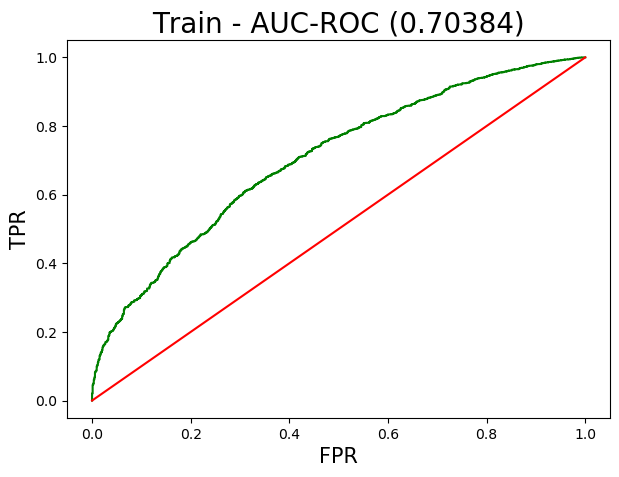

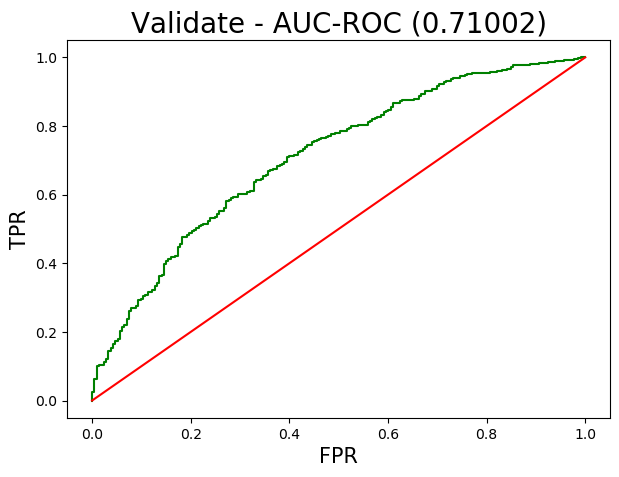

In [24]:
plot_roc_auc(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, model = lr_best_1)

Correlation between X and y

## 6. Logistic Regression - Kaggle Competition Preparation

**[6.1]** Prepare Kaggle Input File using lr_best_1 Logistic Regression

In [25]:
# File URLs
file_path_raw_test= "data/raw/test.csv"
file_path_test= "data/processed/test.csv"

# Load files into df_training and df_validation data frames
df_test = pd.read_csv(file_path_test)
df_test_raw = pd.read_csv(file_path_raw_test)

In [26]:
# Convert X_kaggle to Numpy Array and retrieve ID
X_kaggle    = df_test.to_numpy()
X_kaggle_id = df_test_raw['Id']

**[6.2]** Check Test Dataset is ready for predicting

In [27]:
X_kaggle_id.shape

(3799,)

**[6.3]** Create y Prediction using the Test Dataset

In [28]:
y_predict = lr_best_1.predict_proba(X_kaggle)

In [29]:
print(y_predict)

[[0.5709634  0.4290366 ]
 [0.60195873 0.39804127]
 [0.28629188 0.71370812]
 ...
 [0.50952319 0.49047681]
 [0.21859924 0.78140076]
 [0.55505239 0.44494761]]


In [30]:
print(y_predict[:,1])

[0.4290366  0.39804127 0.71370812 ... 0.49047681 0.78140076 0.44494761]


**[6.4]** Convert the Numpy Array into a Pandas Dataframe with a Column Name TARGET_5Yrs

In [31]:
# Convert numpy arrany y_predict values back to df_train_cleaned_scaled data frame 
y_predict = pd.DataFrame(y_predict[:,1], columns = ['TARGET_5Yrs'])

**[6.5]** Concatenate Player ID and Prediction into on Data Frame and Sort by Id

In [32]:
y_predict = pd.concat([X_kaggle_id, y_predict], axis=1)

In [33]:
#y_predict = y_predict.sort_values(by=['Id'])

In [34]:
print(y_predict)

        Id  TARGET_5Yrs
0        1     0.429037
1     8194     0.398041
2        3     0.713708
3     8196     0.717380
4     8197     0.446114
...    ...          ...
3794  8175     0.714929
3795  8176     0.458829
3796  8178     0.490477
3797  8181     0.781401
3798  8183     0.444948

[3799 rows x 2 columns]


**[6.6]** Export Dataframe to CSV and save model

In [35]:
y_predict.to_csv("data/external/Group1_Assignment1_linear_regression_predictions.csv", index = False)
y_predict.shape

(3799, 2)